In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertisingcsv/Advertising.csv


In [2]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# directly go with linear regression-sklearn uses normal equation so no gradient descent needed
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
model=LinearRegression()

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
y_pred=model.predict(X)

In [16]:
print(f"Intercept (theta_0): {model.intercept_:.2f}")
print(f"Coefficients (theta_1, theta_2, theta_3): {model.coef_}")
cost = mean_squared_error(y, y_pred) / 2
print(f"Cost Function Value: {cost:.4f}")

Intercept (theta_0): 2.94
Coefficients (theta_1, theta_2, theta_3): [ 0.04576465  0.18853002 -0.00103749]
Cost Function Value: 1.3921


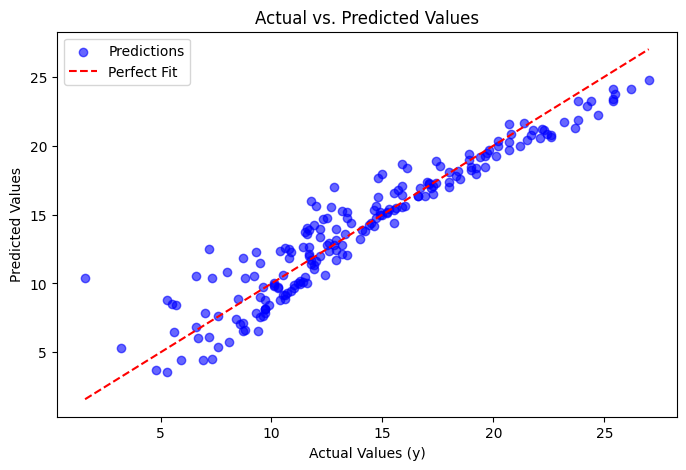

In [17]:
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, color='blue', alpha=0.6, label="Predictions")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [18]:
# now without the library can we do it based on our understanding


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_train=df.drop('Sales',axis=1)

In [21]:
y_train=df['Sales']

In [22]:
# standardization
X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)

X_standardized=(X_train-X_mean)/X_std

In [23]:
# adding bias term y=mx+c which will represent the baseline
X_bias=np.c_[np.ones((X_standardized.shape[0], 1)), X_standardized]
print("X_bias shape:", X_bias.shape)

X_bias shape: (200, 4)


In [24]:
theta = np.random.randn(X_bias.shape[1])
learning_rate = 0.01
epochs = 200
loss_history = []
for epoch in range(epochs):
    y_pred = np.dot(X_bias, theta)
    error = y_pred - y
    loss = (1 / len(y)) * np.sum(error ** 2)
    loss_history.append(loss)
    gradient = (2 / len(y)) * np.dot(X_bias.T, error)
    theta -= learning_rate * gradient
print("\nFinal Weights:", theta)



Final Weights: [13.8136292   3.87409864  2.70122726  0.08042193]


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = np.dot(X_bias, theta)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred) 

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

MSE: 2.8437
RMSE: 1.6863
MAE: 1.3190
R² Score: 0.8950


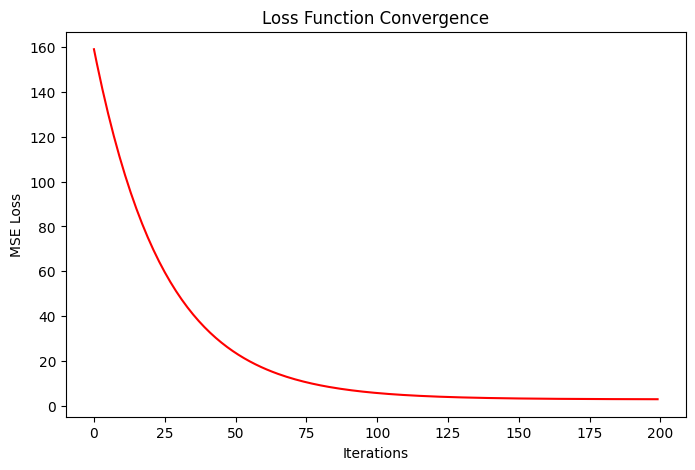

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(epochs), loss_history, color="red")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.title("Loss Function Convergence")
plt.show()


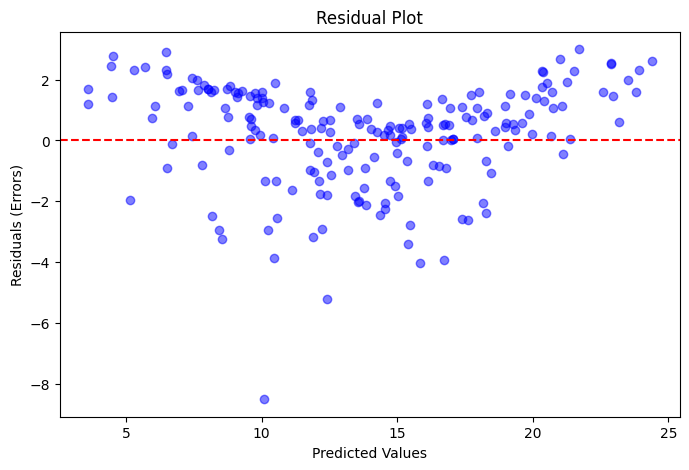

In [27]:
residuals = y - y_pred 
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()

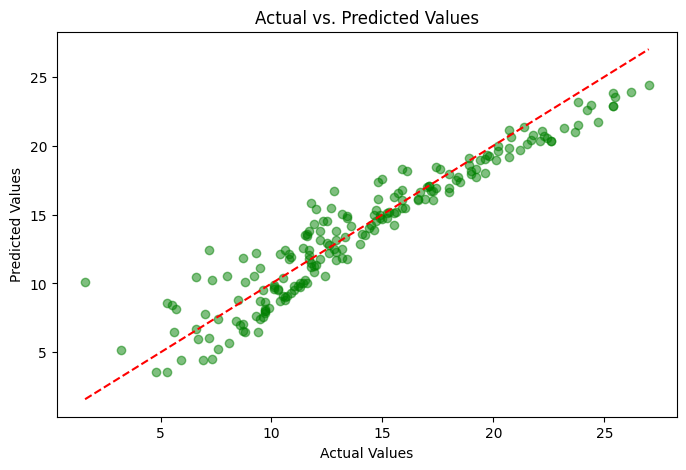

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, color="green", alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linestyle="--")  # Ideal 1:1 line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
